# GoogleNet (Inception) Pretrained Pytorch Implementation




### Imports

In [1]:
import torch
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image
import matplotlib.pyplot as plt
import json

In [2]:
# Load Pretrained Inception v3 Model
model = models.inception_v3(pretrained=True)
model.eval()  # Set to evaluation mode

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:00<00:00, 129MB/s]


Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

### Image Transformations

In [3]:
# Image Transformations
def transform_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((299, 299)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = Image.open(image_path).convert("RGB")
    return transform(image).unsqueeze(0)  # Add batch dimension

### Model Inferencing & Loading Class Labels

In [4]:
# Inference
def predict(image_tensor, model):
    with torch.no_grad():
        outputs = model(image_tensor)
    return torch.nn.functional.softmax(outputs, dim=1)[0]

# Load Class Labels
with open("/content/imagenet_classes.txt") as f:
    labels = [line.strip() for line in f.readlines()]

### Inferencing & Visualizing Results

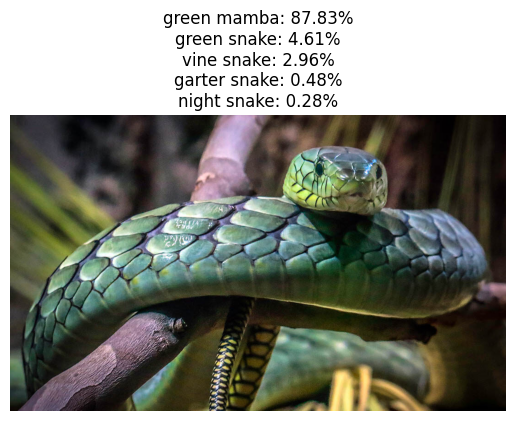

In [5]:
# Visualize Image and Prediction
def visualize(image_path, predictions, labels):
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis("off")

    # Get top 5 predictions
    top5_prob, top5_catid = torch.topk(predictions, 5)
    top5_labels = [labels[i] for i in top5_catid]

    # Show predictions
    plt.title("\n".join([f"{label}: {prob:.2%}" for label, prob in zip(top5_labels, top5_prob)]))
    plt.show()

# Example Usage
image_path = "/content/green_mamba1.jpg"  # Change to your image path
image_tensor = transform_image(image_path)
predictions = predict(image_tensor, model)
visualize(image_path, predictions, labels)